In [3]:

pip install -U emcee

Requirement already up-to-date: emcee in c:\users\bansa\anaconda3\lib\site-packages (3.1.2)Note: you may need to restart the kernel to use updated packages.



In [36]:
pip install corner

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm
import emcee

In [2]:
from getdist import plots, MCSamples
import getdist

In [3]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [4]:
def E( parameters,z):   #Flat lambdaCDM universe
    omega=parameters[0]
    omega_lambda=parameters[1]
    omega_R = 1-omega-omega_lambda
    return ((omega*((1+z)**3)) + (omega_R*((1+z)**2))+ omega_lambda)**(1/2)

In [5]:
def erf_new(x):
    return ((4/np.pi)**(1/2))*(erf(x)-erf(0))

In [6]:
def alpha(parameters,sigma_Ho,sigma,z):
    #sigma,z,H_obs are vectors

    n = len(sigma)
    alpha0=1/(sigma_Ho)**2
    for i in range(n):
        alpha0 = alpha0 + (E(parameters,z[i])/sigma[i])**2
        
    return alpha0

In [7]:
def beta(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    n = len(sigma)
    beta0=Ho/((sigma_Ho)**2)
    for i in range(n):
        beta0 = beta0 + (E(parameters,z[i])*H_obs[i]/((sigma[i])**2))
        
    return beta0
    

In [8]:
def gamma(Ho,sigma_Ho,H_obs,sigma):
    n = len(sigma)
    gamma0=(Ho/(sigma_Ho))**2
    for i in range(n):
        gamma0 = gamma0 + (H_obs[i]/sigma[i])**2
        
    return gamma0 

In [9]:
def Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    alpha0= alpha(parameters,sigma_Ho,sigma,z)
    beta0= beta(parameters,Ho,sigma_Ho,H_obs,sigma,z)
    gamma0= gamma(Ho,sigma_Ho,H_obs,sigma)
    LH1= (1/(4*alpha0*((sigma_Ho)**2)))**(1/2)
    LH2= np.exp(-gamma0/2+(((beta0)**2)/(2*alpha0)))
    LH3 = 1+ erf_new(beta0/((2*alpha0)**(1/2)))
    return (LH1*LH2*LH3)

In [10]:
def Chi_sq(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return (-2*np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)))

In [11]:
def log_likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z))

In [12]:
def log_prior(parameters):
    omega,omega_lambda = parameters
    if 0 < omega < 2.0 and 0.0 < omega_lambda < 2.0 :
        return 0.0
    return -np.inf

In [13]:
def log_probability(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
   
    return lp + log_likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)

In [14]:
Data = pd.read_csv("Hdata - Table 1.csv")
print(Data)

    Unnamed: 0      z      H  Sigma
0          NaN  0.070   69.0   19.6
1          NaN  0.100   69.0   12.0
2          NaN  0.120   68.6   26.2
3          NaN  0.170   83.0    8.0
4          NaN  0.179   75.0    4.0
5          NaN  0.199   75.0    5.0
6          NaN  0.200   72.9   29.6
7          NaN  0.270   77.0   14.0
8          NaN  0.280   88.8   36.6
9          NaN  0.350   76.3    5.6
10         NaN  0.352   83.0   14.0
11         NaN  0.400   95.0   17.0
12         NaN  0.440   82.6    7.8
13         NaN  0.480   97.0   62.0
14         NaN  0.593  104.0   13.0
15         NaN  0.600   87.9    6.1
16         NaN  0.680   92.0    8.0
17         NaN  0.730   97.3    7.0
18         NaN  0.781  105.0   12.0
19         NaN  0.875  125.0   17.0
20         NaN  0.880   90.0   40.0
21         NaN  0.900  117.0   23.0
22         NaN  1.037  154.0   20.0
23         NaN  1.300  168.0   17.0
24         NaN  1.430  177.0   18.0
25         NaN  1.530  140.0   14.0
26         NaN  1.750  202.0

In [15]:
Data = Data.to_numpy()

In [16]:
z = Data[:,1]
H_obs = Data[:,2]
sigma = Data[:,3]
print(z)

[0.07  0.1   0.12  0.17  0.179 0.199 0.2   0.27  0.28  0.35  0.352 0.4
 0.44  0.48  0.593 0.6   0.68  0.73  0.781 0.875 0.88  0.9   1.037 1.3
 1.43  1.53  1.75  2.3  ]


In [17]:
print(np.exp(-3.085))

0.04573003390021825


In [18]:
Ho= 68
sigma_Ho=2.8

In [74]:
best_fit_params1 = minimize (Chi_sq,x0=[0,0],args=(73.8,2.4,H_obs,sigma,z),bounds=[(0,2),(0,2)])
print(best_fit_params1)
print(np.round((best_fit_params1.x),2))
print(np.round((best_fit_params1.fun),2))

      fun: 19.100213083961627
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0003336, -0.0001954])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([0.32022274, 0.90850051])
[0.32 0.91]
19.1


In [69]:
from scipy.optimize import fsolve
import math


def func(x,best_fit_params):
    omega_da,omega_lambda_da=best_fit_params
    return (omega_da*((1+x)**3)-((omega_lambda_da)*2))

x1 = scipy.optimize.fsolve(func,0.7,args=(best_fit_params1.x))
x2 = scipy.optimize.fsolve(func,0.7,args=(best_fit_params2.x))
print (np.round(x2,3),np.round(x1,3))

[0.705] [0.784]


In [20]:
import emcee

pos = best_fit_params1.x + 1e-4 * np.random.randn(200, 2)
nwalkers, ndim = pos.shape

filename = "Ho73.8_LCDM.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(73.8,2.4,H_obs,sigma,z),backend=backend
)

sampler.run_mcmc(pos, 10000, progress=True);


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [12:39<00:00, 13.17it/s]


In [21]:
max_n = 10000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

  3%|██▎                                                                         | 3000/100000 [01:19<42:58, 37.62it/s]


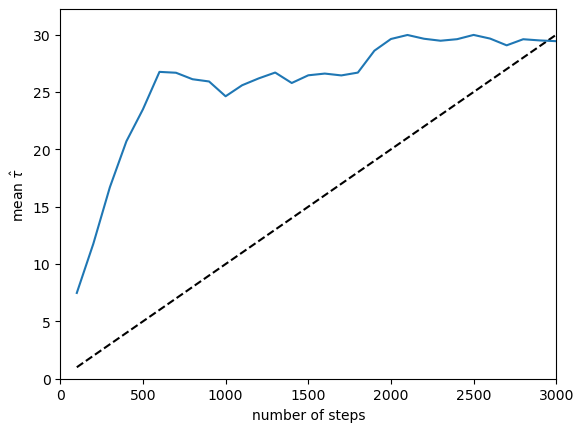

In [22]:
import matplotlib.pyplot as plt

n = 100 * np.arange(1, index + 1)
y = autocorr[:index]
plt.plot(n, n / 100.0, "--k")
plt.plot(n, y)
plt.xlim(0, n.max())
plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$");

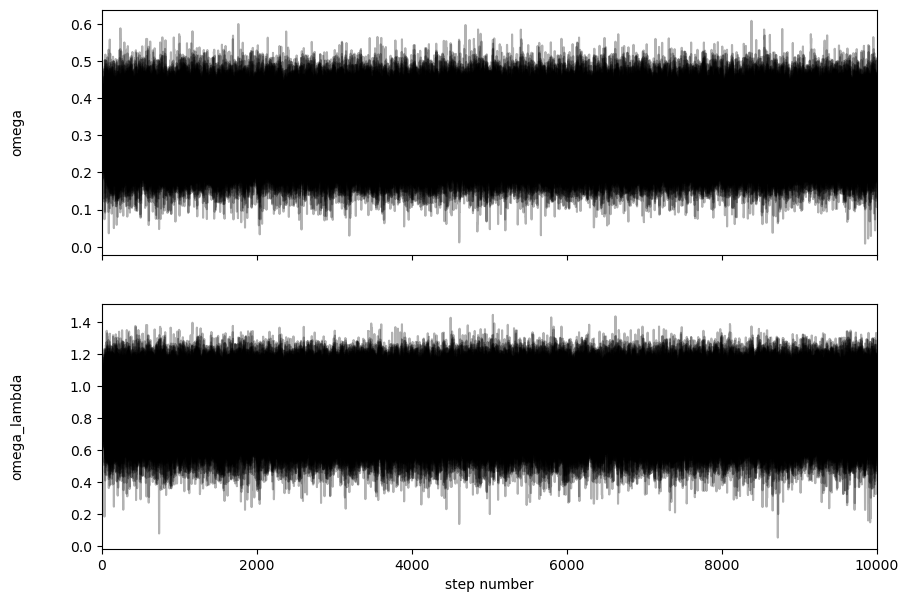

In [21]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["omega", "omega_lambda"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)

axes[-1].set_xlabel("step number");

In [22]:
tau = sampler.get_autocorr_time()
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

burn-in: 62
thin: 15
flat chain shape: (132400, 2)


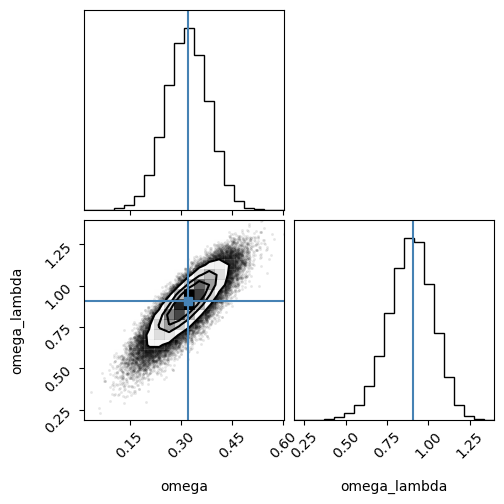

In [33]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[0.32022274, 0.90850051]
);

In [51]:
ndim = 2
nsamp = 132400
samps = flat_samples
#samps2 = flat_samples2

In [52]:
names = ["omega","omega_lambda"]
labels =  ["\Omega_{mo}","\Omega_{\Lambda}"]
samples = MCSamples(samples=samps,names = names, labels = labels)
#samples2 = MCSamples(samples=samps2,names = names, labels = labels)


Removed no burn in


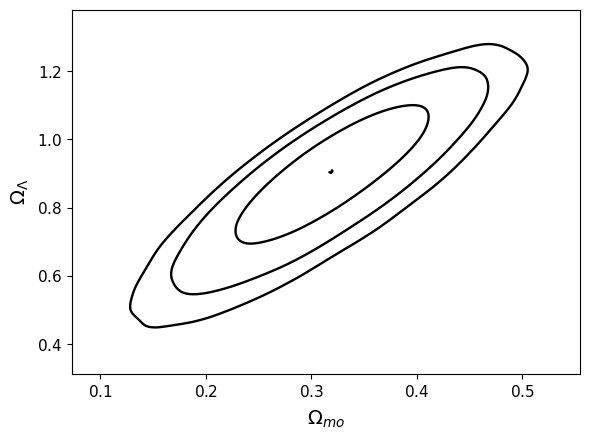

In [53]:
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d(samples, 'omega', 'omega_lambda');

In [54]:
xlist = np.linspace(0, 0.60, 1000)
ylist = np.linspace(0, 1.4, 1000)

<ipython-input-55-b9eb1bbe7b4b>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,0.23,"Acceleration",Rotation="10",weight="bold")
<ipython-input-55-b9eb1bbe7b4b>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,0.12,"Deceleration",Rotation="10",weight="bold")
<ipython-input-55-b9eb1bbe7b4b>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.018,0.88,"Open",Rotation="-20",weight="bold")
<ipython-input-55-b9eb1bbe7b4b>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.02,0.95,"Closed",Rotation="-20",weight="bold")
<ipython-input-55-b9eb1bbe7b4b>:23: MatplotlibDeprecationWarning: Case-in

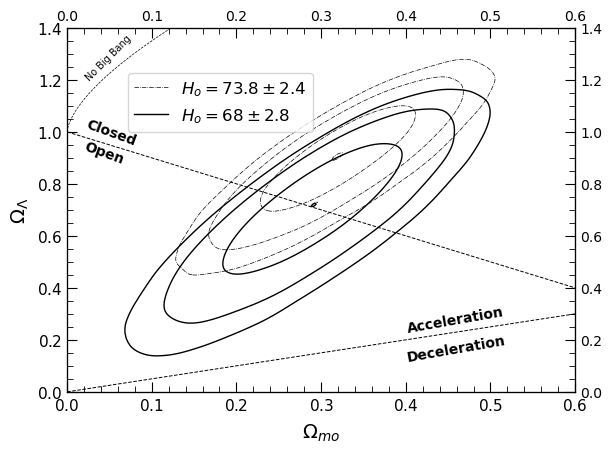

In [55]:
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.007,0.68, 0.95, 0.99]})
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d([samples,samples2], 'omega', 'omega_lambda',lws=[0.5,1],filled=[False,False],colors=["Black","Black"],ls=["dashdot","solid"]);
#g.plot_2d([samples2], 'omega', 'omega_lambda',lws=[1],filled=[False],colors=["Black"],ls=["solid"]);
g.add_legend(['$H_o=73.8 \pm 2.4$', '$H_o=68 \pm 2.8$'], bbox_to_anchor=(0.5,0.9));
ax1= g.get_axes()

ax1.set_ylim(0,1.4)
ax1.set_xlim(0,0.6)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.text(0.4,0.23,"Acceleration",Rotation="10",weight="bold")
ax1.text(0.4,0.12,"Deceleration",Rotation="10",weight="bold")
ax1.text(0.018,0.88,"Open",Rotation="-20",weight="bold")
ax1.text(0.02,0.95,"Closed",Rotation="-20",weight="bold")
ax1.text(0.02,1.2,"No Big Bang",Rotation="45",size="x-small")

ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(0,1.4)
ax3= ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0,0.6)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)


flat_lambda_CDM=g.add_line(xlist,1-xlist,c="black",ls="--",lw=0.7)
acceleration_line=g.add_line(xlist,xlist/2,c="black",ls="--",lw=0.7)
omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
nobigbang= g.add_line(xlist,omega_lambda_nobigbang,c="black",lw=0.5)

In [73]:
best_fit_params2 = minimize (Chi_sq,x0=[0,0],args=(68,2.8,H_obs,sigma,z),bounds=[(0,2),(-1,1)])
print(best_fit_params2)
print(np.round((best_fit_params2.x),2))
print(np.round((best_fit_params2.fun),2))

      fun: 18.06910992024372
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00024727, -0.00054463])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 9
     njev: 14
   status: 0
  success: True
        x: array([0.29227965, 0.72380354])
[0.29 0.72]
18.07


In [43]:
import emcee

pos = best_fit_params2.x + 1e-4 * np.random.randn(200, 2)
nwalkers, ndim = pos.shape

filename = "Ho68_LCDM.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(68,2.8,H_obs,sigma,z),backend=backend
)
sampler.run_mcmc(pos, 10000, progress=True);

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [12:44<00:00, 13.07it/s]


In [34]:
max_n = 100000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

  3%|██▎                                                                         | 3000/100000 [01:10<37:45, 42.81it/s]


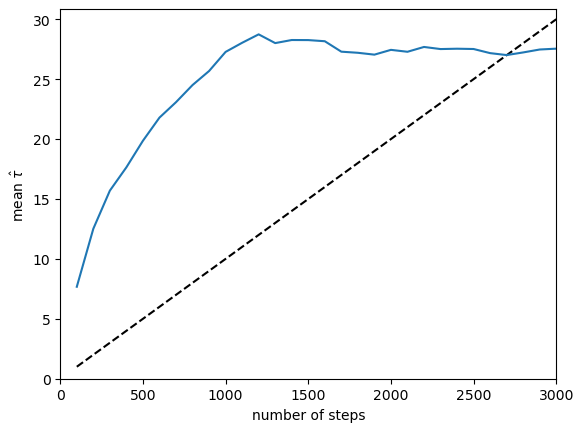

In [35]:
import matplotlib.pyplot as plt

n = 100 * np.arange(1, index + 1)
y = autocorr[:index]
plt.plot(n, n / 100.0, "--k")
plt.plot(n, y)
plt.xlim(0, n.max())
plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$");

In [44]:
tau = sampler.get_autocorr_time()
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples2 = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples2.shape))

burn-in: 62
thin: 15
flat chain shape: (132400, 2)


In [46]:
names = ["omega","omega_lambda"]
labels =  ["\Omega_{mo}","\Omega_{\Lambda}"]
samples2 = MCSamples(samples=flat_samples2,names = names, labels = labels)

Removed no burn in


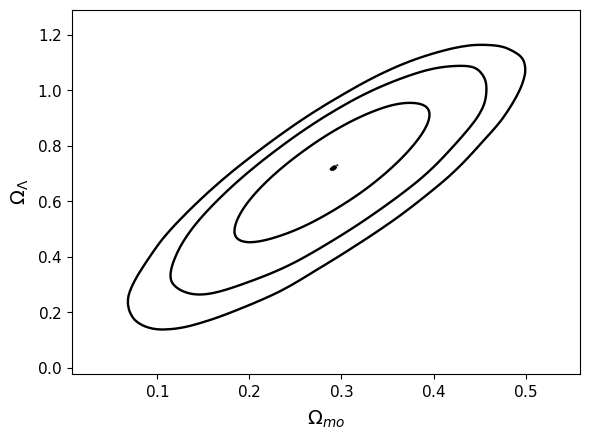

In [49]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d(samples2, 'omega', 'omega_lambda');

In [26]:
reader = emcee.backends.HDFBackend("tutorial.h5")

tau = reader.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))

burn-in: 62
thin: 15
flat chain shape: (132400, 2)


In [57]:
from IPython.display import display, Math

for i in range(2):
    mcmc = np.percentile(flat_samples[:, i], [2.28, 50, 97.7])
    q = np.diff(mcmc)
    minimum = mcmc[1]-q[0]
    maximum = mcmc[1]+q[1]
    #print(f"{minimum} $\le \Omega \ge$ {maximum}")
    txt = "\mathrm{{{3}}} = {0:.2f}_{{{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], mcmc[1]-q[0], mcmc[1]+q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
from IPython.display import display, Math

for i in range(2):
    mcmc = np.percentile(flat_samples2[:, i], [2.28, 50, 97.7])
    q = np.diff(mcmc)
    minimum = mcmc[1]-q[0]
    maximum = mcmc[1]+q[1]
    #print(f"{minimum} $\le \Omega \ge$ {maximum}")
    txt = "\mathrm{{{3}}} = {0:.2f}_{{{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], mcmc[1]-q[0], mcmc[1]+q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
omega = samples[:,0]
print(np.mean(omega))
labels = ["omega", "omega_lambda"]

0.2874843618520113


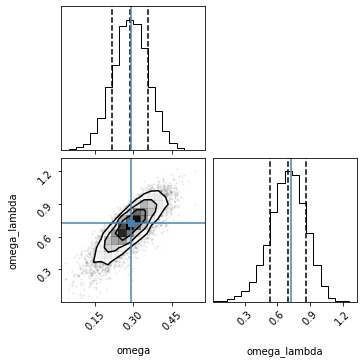

In [9]:
import corner

fig = corner.corner(
    samples, labels=labels, truths=[0.29227965, 0.72380354],plot_datapoints=True,quantiles=[0.16, 0.5, 0.84]
);

In [ ]:
0.29227965
0.6939033654745105